Broken - gives wild oscillations

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
R = 8.314  # Universal gas constant, J/(mol·K)
print(f"R: {R} J/(mol·K)")
T = 298.15  # Temperature in Kelvin (25°C)
print(f"T: {T} K")
H_atm = 29.4  # Henry's Law constant for CO2 in water at 25°C, atm·m³/mol
print(f"H_atm: {H_atm} atm·m³/mol")
H_Pa = H_atm * 101325  # Henry's Law constant in Pa·m³/mol
print(f"H_Pa: {H_Pa} Pa·m³/mol")
k = 1e-6  # Mass transfer coefficient, m/s
print(f"k: {k} m/s")
hydration_level = 0.1  # 10%
print(f"hydration_level: {hydration_level}")
rho_concrete = 2400  # Density of concrete, kg/m³
print(f"rho_concrete: {rho_concrete} kg/m³")
rho_water = 1000  # Density of water, kg/m³
print(f"rho_water: {rho_water} kg/m³")
wetting_coefficient = 0.8  # Wetting coefficient
print(f"wetting_coefficient: {wetting_coefficient}")
P_total_atm = 1.0  # Total pressure in atm (standard pressure)
P_total_Pa = P_total_atm * 101325  # Total pressure in Pa (standard pressure)
print(f"P_total_atm: {P_total_atm} atm")
print(f"P_total_Pa: {P_total_Pa} Pa")
percentage_CO2 = 0.04  # Percentage of CO2 in air (4%)
print(f"percentage_CO2: {percentage_CO2}")
V = 1.0  # Volume in m³
print(f"V: {V} m³")

# Reaction constants
k_forward = 0.039  # Forward rate constant for CO2 to H2CO3, s⁻¹
k_reverse = 23  # Reverse rate constant for H2CO3 to CO2, s⁻¹
K_eq = 1.7e-3  # Equilibrium constant for the reaction



R: 8.314 J/(mol·K)
T: 298.15 K
H_atm: 29.4 atm·m³/mol
H_Pa: 2978955.0 Pa·m³/mol
k: 1e-06 m/s
hydration_level: 0.1
rho_concrete: 2400 kg/m³
rho_water: 1000 kg/m³
wetting_coefficient: 0.8
P_total_atm: 1.0 atm
P_total_Pa: 101325.0 Pa
percentage_CO2: 0.04
V: 1.0 m³


In [ ]:
# Function to calculate total surface area
def calculate_surface_area_normal_distribution(mean_diameter, std_deviation, min_diameter, max_diameter, reactor_volume, void_fraction, num_samples=100000):
    diameters = np.random.normal(loc=mean_diameter, scale=std_deviation, size=num_samples)
    diameters = diameters[(diameters >= min_diameter) & (diameters <= max_diameter)]
    radii = diameters / 2
    volumes = (4/3) * np.pi * (radii ** 3)
    total_particle_volume = reactor_volume * (1 - void_fraction)
    total_volume_of_sampled_particles = np.sum(volumes)
    scaling_factor = total_particle_volume / total_volume_of_sampled_particles
    surface_areas = 4 * np.pi * (radii ** 2)
    total_surface_area = np.sum(surface_areas * scaling_factor)
    return total_surface_area

# Example usage:
mean_diameter = 0.01  # Mean diameter of 1 cm in meters
print(f"mean_diameter: {mean_diameter} m")
std_deviation = 0.002  # Standard deviation of 0.2 cm in meters
print(f"std_deviation: {std_deviation} m")
min_diameter = 0.005  # Minimum diameter of 0.5 cm in meters
print(f"min_diameter: {min_diameter} m")
max_diameter = 0.015  # Maximum diameter of 1.5 cm in meters
print(f"max_diameter: {max_diameter} m")
reactor_volume = 1.0  # 1 cubic meter
print(f"reactor_volume: {reactor_volume} m³")
void_fraction = 0.4  # 40% void fraction
print(f"void_fraction: {void_fraction}")

total_surface_area = calculate_surface_area_normal_distribution(
    mean_diameter, std_deviation, min_diameter, max_diameter, reactor_volume, void_fraction
)

# Total surface area
print("total_surface_area:", f"{total_surface_area:.4g}", "m²")

# Available surface area for gas exchange
available_surface_area = total_surface_area * wetting_coefficient
print("available_surface_area:", f"{available_surface_area:.4g}", "m²")

mean_diameter: 0.01 m
std_deviation: 0.002 m
min_diameter: 0.005 m
max_diameter: 0.015 m
reactor_volume: 1.0 m³
void_fraction: 0.4
total_surface_area: 336.5 m²
available_surface_area: 269.2 m²


In [ ]:
# Calculate the partial pressure of CO2 in air
P_CO2 = percentage_CO2 * P_total_Pa
print(f"P_CO2: {P_CO2:.4g} Pa")

# Convert partial pressure to concentration in mol/m³
n_CO2 = P_CO2 / (R * T) * V
concentration_CO2 = n_CO2 / V
print("n_CO2:", f"{n_CO2:.4g}", "mol")
print("concentration_CO2:", f"{concentration_CO2:.4g}", "mol/m³")

# Solid phase volume and mass
solid_volume = reactor_volume * (1 - void_fraction)
solid_mass = solid_volume * rho_concrete
print("solid_volume:", f"{solid_volume:.4g}", "m³")
print("solid_mass:", f"{solid_mass:.4g}", "kg")

# Liquid phase mass and volume
liquid_mass = hydration_level * solid_mass
liquid_volume = liquid_mass / rho_water
print("liquid_mass:", f"{liquid_mass:.4g}", "kg")
print("liquid_volume:", f"{liquid_volume:.4g}", "m³")

# Gas phase volume
gas_volume = reactor_volume - solid_volume - liquid_volume
print("gas_volume:", f"{gas_volume:.4g}", "m³")

# Initial partial pressure of CO2 in the gas phase
P_CO2_initial = concentration_CO2 * R * T
print("P_CO2_initial:", f"{P_CO2_initial:.4g}", "Pa")

# Initial equilibrium concentration of CO2 in the liquid phase using Henry's Law and standard CO2 concentration in air
C_l_initial_eq = ((P_total_Pa * 0.0004) / H_Pa)*1000
print("C_l_initial_eq:", f"{C_l_initial_eq:.4g}", "mol/m³")
print(f"P_CO2: {(P_total_Pa * 0.0004):.4g} Pa")


# CO2 solubility
C_sol_initial = (P_CO2 / H_Pa)*1000
print("C_sol_initial:", f"{C_sol_initial:.4g}", "mol/m³")

# Initial concentration of CO2 in the gas phase
C_g_initial = P_CO2_initial / (R * T)
print("C_g_initial:", f"{C_g_initial:.4g}", "mol/m³")

# Initial concentration of carbonic acid
H2CO3_initial = C_l_initial_eq * K_eq
print("H2CO3_initial:", f"{H2CO3_initial:.4g} mol/m³")

# Calculate molarity of water
molar_mass_water = 18.015  # g/mol
M_H2O = rho_water / molar_mass_water  # Molarity of water


# Lists to store results
time_points = [0]  # Initial time
C_g_values = [C_g_initial]  # Initial gas phase CO2 concentration
C_l_values = [C_l_initial_eq]  # Initial liquid phase CO2 concentration
C_sol_values = [C_sol_initial]  # CO2 solubiliy
mass_transfer_rates = []  # Mass transfer rates
CO2_transferred = []  # CO2 transferred from gas to liquid phase
H2CO3_values = [H2CO3_initial]  # Initial carbonic acid concentration
H2CO3_values.append(H2CO3_initial)



P_CO2: 4053 Pa
n_CO2: 1.635 mol
concentration_CO2: 1.635 mol/m³
solid_volume: 0.6 m³
solid_mass: 1440 kg
liquid_mass: 144 kg
liquid_volume: 0.144 m³
gas_volume: 0.256 m³
P_CO2_initial: 4053 Pa
C_l_initial_eq: 0.01361 mol/m³
P_CO2: 40.53 Pa
C_sol_initial: 1.361 mol/m³
C_g_initial: 1.635 mol/m³
H2CO3_initial: 2.313e-05 mol/m³


In [ ]:
# Lists to store results
time_points = [0]  # Initial time

# Main loop
iteration = 0
while True:
    iteration += 1
    if iteration == 10000:
        break
    # Other code can go here
    print(f"Iteration {iteration}")
    # Calculate mass transfer rate
    if (C_l_values[-1]) < C_sol_values[-1]:
        mass_transfer_rate = k * available_surface_area * (C_sol_values[-1] - C_l_values[-1])
        mass_transfer_rates.append(mass_transfer_rate)
        print("mass_transfer_rate:", mass_transfer_rate)
        print("(C_g_values[-1] - (C_sol_values[-1] - C_l_values[-1]):", (C_g_values[-1] - (C_sol_values[-1] - C_l_values[-1])))
        print("(C_sol_values[-1] - C_l_values[-1]):", (C_sol_values[-1] - C_l_values[-1]))
        print("C_g_values[-1]:", C_g_values[-1])
        print("C_l_values[-1]:", C_l_values[-1])
        print("C_sol_values[-1]:", C_sol_values[-1])

    else:
        break

    # Limit the time step to prevent large changes in concentrations
    time_step = min(1, 0.001 * gas_volume / abs(mass_transfer_rate)) if mass_transfer_rate < 0 else 0.01255

    # Update concentrations in gas and liquid phases
    C_g_new = C_g_values[-1] - mass_transfer_rate * time_step / gas_volume
    C_l_new = C_l_values[-1] + mass_transfer_rate * time_step / liquid_volume
#(H2CO3_values[-1]-H2CO3_values[-2])
    # Calculate carbonic acid concentration
    H2CO3_new = (H2CO3_values[-1] + ((k_forward * C_l_values[-1] * time_step)/ liquid_volume) - (((k_reverse * H2CO3_values[-1] * time_step)/ liquid_volume)))
    print((k_forward * C_l_values[-1] * time_step))
    print((k_reverse * H2CO3_values[-1] * time_step))


    # Calculate new equilibrium concentration in the liquid phase considering the updated gas phase concentration
    if C_g_new > 0:
        P_CO2_gas_new = C_g_new * R * T  # Calculate new partial pressure of CO2 in the gas phase
        C_sol_new = (P_CO2_gas_new / H_Pa)*1000  # Calculate equilibrium concentration using updated partial pressure
    else:
        break

    # Print debug information
    print(f"Iteration {iteration}:")
    print(f"Time: {time_points[-1]} seconds")
    print(f"Time step: {time_step:.6f} seconds")
    print(f"Mass transfer rate: {mass_transfer_rate:.6f} mol/s")
    print(f"CO2 concentration in gas phase: {C_g_new:.6f} mol/m³")
    print(f"CO2 concentration in liquid phase: {C_l_new:.6f} mol/m³")
    print(f"Equilibrium concentration in liquid phase: {C_sol_new:.6f} mol/m³\n")
    print(f"Carbonic acid concentration: {H2CO3_new:.6f} mol/m³\n")

    # Check if the equilibrium concentration matches the concentration in the liquid phase
    #if abs(C_l_new - C_sol_new) < 1e-6:  # Using a small tolerance for convergence
    #    break  # Break the loop if equilibrium is reached

    # Check if the equilibrium concentration matches the concentration in the liquid phase
    #if abs(H2CO3_new - H2CO3_values[-1]) < 1e-20:  # Using a small tolerance for convergence
    #    break  # Break the loop if equilibrium is reached

    # Check if the mass transfer rate is less than 1 umol/minute
    if abs(mass_transfer_rate) < 0.00000000001666666:
        print("Mass transfer rate is less than 1 umol/minute. Breaking loop.")
        break



    # Update time and concentrations for the next iteration
    time_points.append(time_points[-1] + time_step)  # Increment time by the time step
    C_g_values.append(C_g_new)
    C_l_values.append(C_l_new)
    C_sol_values.append(C_sol_new)
    H2CO3_values.append(H2CO3_new)







Streaming output truncated to the last 5000 lines.

Carbonic acid concentration: 948455489157.956543 mol/m³

Iteration 9737
mass_transfer_rate: 0.00025929297106776905
(C_g_values[-1] - (C_sol_values[-1] - C_l_values[-1]): 0.5248320385250315
(C_sol_values[-1] - C_l_values[-1]): 0.9631806440981999
C_g_values[-1]: 1.4880126826232314
C_l_values[-1]: 0.27501001629401933
C_sol_values[-1]: 1.2381906603922193
0.00013460365247510776
273771676945.44415
Iteration 9737:
Time: 122.18680000001496 seconds
Time step: 0.012550 seconds
Mass transfer rate: 0.000259 mol/s
CO2 concentration in gas phase: 1.488000 mol/m³
CO2 concentration in liquid phase: 0.275033 mol/m³
Equilibrium concentration in liquid phase: 1.238180 mol/m³

Carbonic acid concentration: -952736711852.071533 mol/m³

Iteration 9738
mass_transfer_rate: 0.0002592840400822865
(C_g_values[-1] - (C_sol_values[-1] - C_l_values[-1]): 0.5248525025089199
(C_sol_values[-1] - C_l_values[-1]): 0.9631474686815502
C_g_values[-1]: 1.4879999711904701
C_

Final concentration of CO2 in the gas phase: 1.484685 mol/m³
Final concentration of CO2 in the liquid phase: 0.280927 mol/m³
Final mass transfer rate: 0.000324 mol/s
Final HCO3: -3100492770900.055176 mol/m³


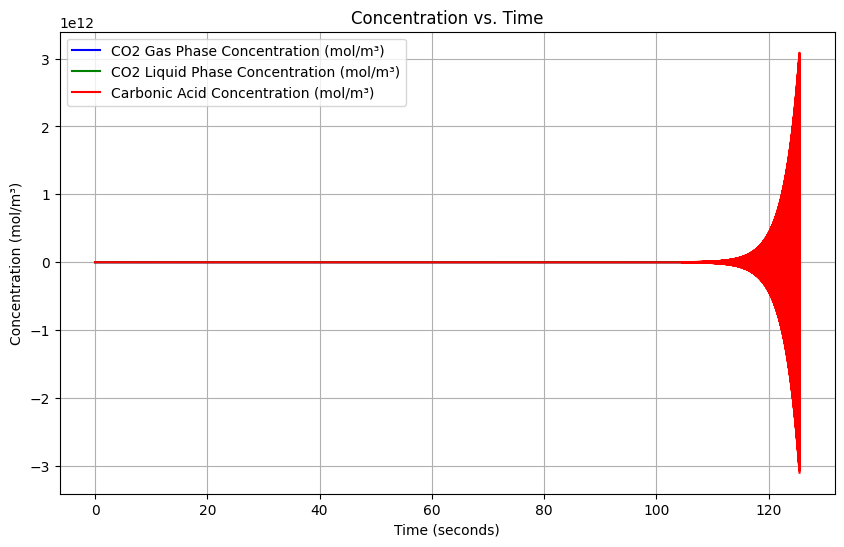

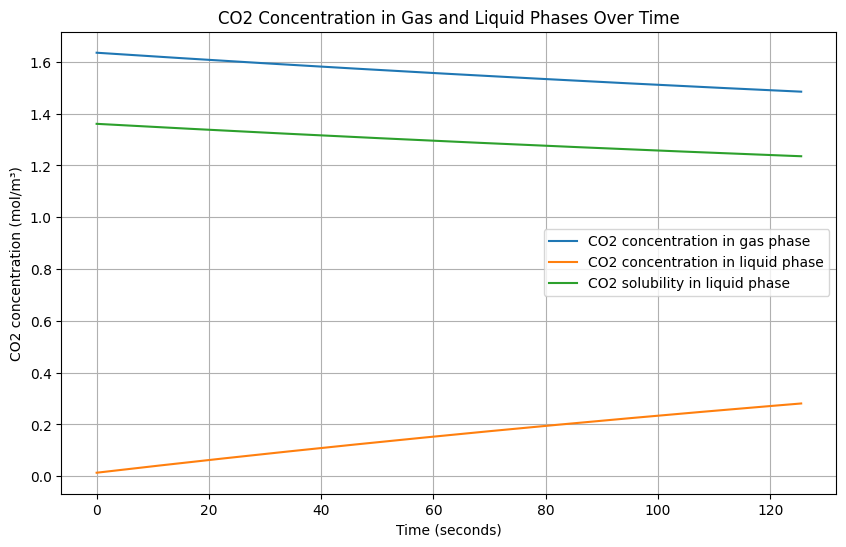

In [ ]:
# Print final concentrations and mass transfer rate at the end of the simulation
final_mass_transfer_rate = k * available_surface_area * (C_g_values[-1] - C_l_values[-1])
print(f"Final concentration of CO2 in the gas phase: {C_g_values[-1]:.6f} mol/m³")
print(f"Final concentration of CO2 in the liquid phase: {C_l_values[-1]:.6f} mol/m³")
print(f"Final mass transfer rate: {final_mass_transfer_rate:.6f} mol/s")
print(f"Final HCO3: {H2CO3_values[-1]:.6f} mol/m³")

time_points.append(time_points[-1] + time_step)  # Increment time by the time step
C_g_values.append(C_g_new)
C_l_values.append(C_l_new)
C_sol_values.append(C_sol_new)

# Plotting
plt.figure(figsize=(10, 6))

# Gas phase CO2 concentration
plt.plot(time_points, C_g_values, label='CO2 Gas Phase Concentration (mol/m³)', color='blue')

# Liquid phase CO2 concentration
plt.plot(time_points, C_l_values, label='CO2 Liquid Phase Concentration (mol/m³)', color='green')

# Carbonic acid concentration
plt.plot(time_points, H2CO3_values, label='Carbonic Acid Concentration (mol/m³)', color='red')

plt.xlabel('Time (seconds)')
plt.ylabel('Concentration (mol/m³)')
plt.title('Concentration vs. Time')
plt.legend()
plt.grid(True)
plt.show()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time_points, C_g_values, label='CO2 concentration in gas phase')
plt.plot(time_points, C_l_values, label='CO2 concentration in liquid phase')
plt.plot(time_points, C_sol_values, label='CO2 solubility in liquid phase')
plt.xlabel('Time (seconds)')
plt.ylabel('CO2 concentration (mol/m³)')
plt.title('CO2 Concentration in Gas and Liquid Phases Over Time')
plt.legend()
plt.grid(True)
plt.show()